# Task 3: Heart Disease Prediction

Loading Dataset

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart.csv")

# Display first five rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Inspecting the Dataset

In [5]:
# Shape of the dataset
print("Shape:", df.shape)

# Column information
print("\nDataset Info:")
print(df.info())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Shape: (303, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca         

Exploratory Data Analysis (EDA)

<Figure size 1200x1000 with 0 Axes>

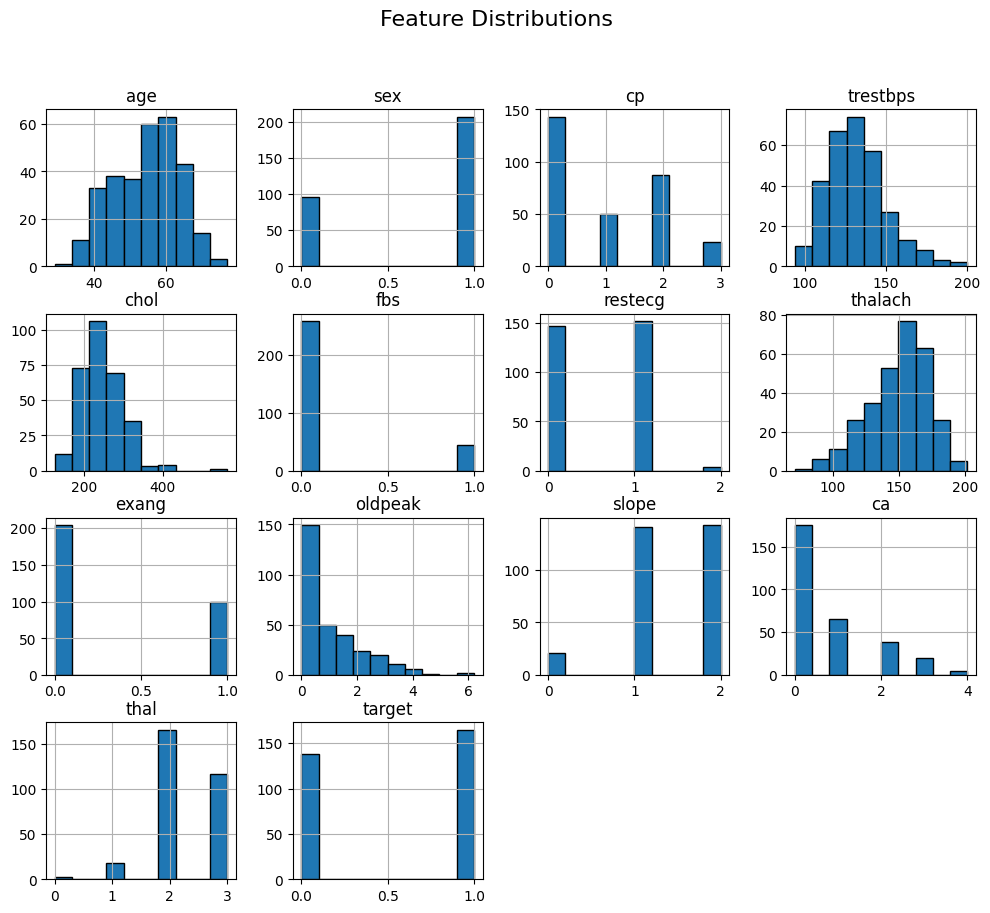

In [6]:
#feature Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
df.hist(figsize=(12,10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


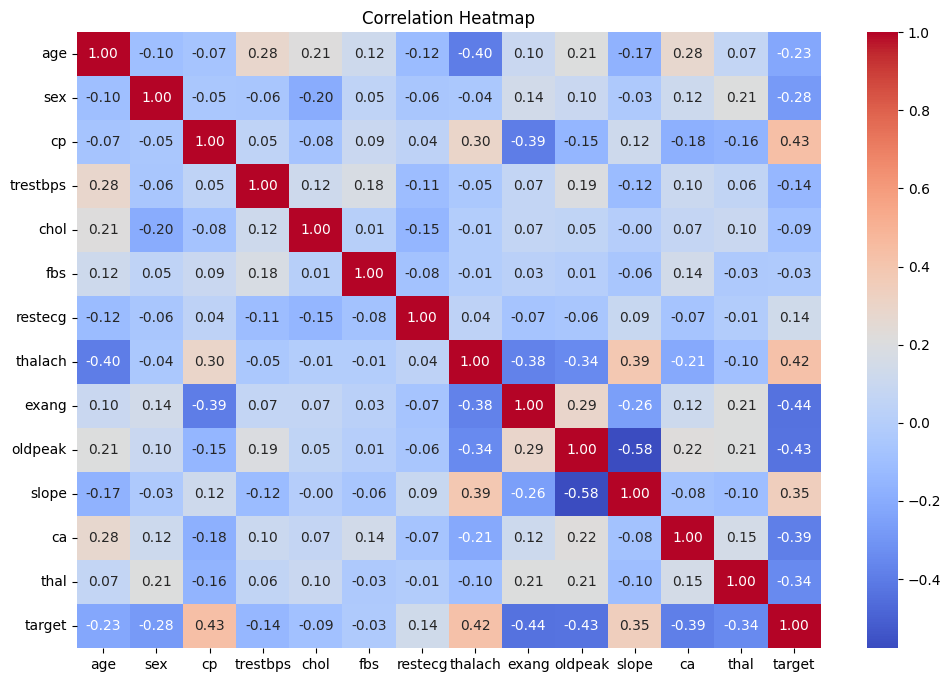

In [7]:
#Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# --------------------------------------------
# STEP 7: Spliting the dataset into Train & Test
# --------------------------------------------

from sklearn.model_selection import train_test_split

# X contains all features (inputs)
X = df.drop("target", axis=1)  # drop the target column

# y contains the labels (output)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display shape of training and testing sets
X_train.shape, X_test.shape


((242, 13), (61, 13))

Model Training

In [10]:
from sklearn.linear_model import LogisticRegression

# create and train model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

y_pred[:10]


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

Model Evaluation

In [11]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8688524590163934

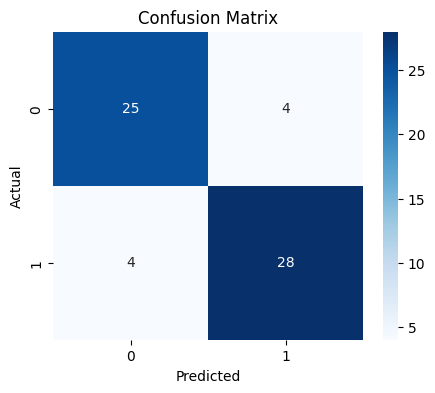

In [12]:
#Confusion Matrix + Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



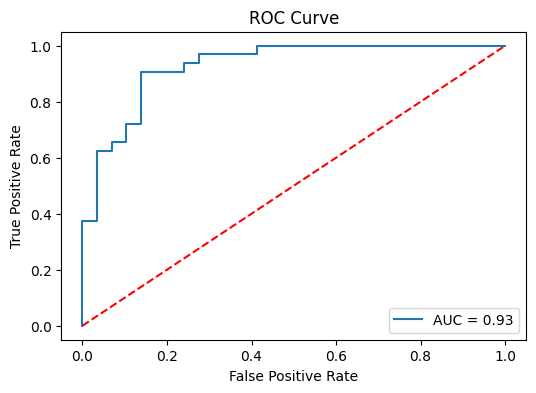

np.float64(0.927801724137931)

In [15]:
#ROC Curve + AUC Score
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

roc_auc


### Insights:
- The Logistic Regression model achieved an accuracy of 87%, showing strong performance on this dataset.
- AUC score of 0.93 indicates the model is excellent at distinguishing patients with and without heart disease.
- Precision and recall values are balanced for both classes, meaning the model does not favor one class over the other.
- Key features correlated with heart disease include chest pain type (cp), maximum heart rate (thalach), ST depression (oldpeak), exercise-induced angina (exang), and number of major vessels (ca).
- The dataset is clean with no missing values, making preprocessing easier.
- Logistic Regression is a good baseline model for medical classification due to interpretability and solid performance.
- This model can help doctors quickly identify patients at risk, but it should not replace professional diagnosis.
